# Neural IBM1 - Task 2


In [1]:
#imports
import tensorflow as tf
import numpy as np
from pprint import pprint
import pickle
from statstracker import StatsTracker
%pylab inline
from utils import smart_reader, bitext_reader, iterate_minibatches, prepare_data
from vocabulary import OrderedCounter, Vocabulary

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Get vocab
train_e_path = 'data/training/hansards.36.2.e.gz'
train_f_path = 'data/training/hansards.36.2.f.gz'
dev_e_path = 'data/validation/dev.e.gz'
dev_f_path = 'data/validation/dev.f.gz'
dev_wa = 'data/validation/dev.wa.nonullalign'

max_tokens=1000

corpus_e = smart_reader(train_e_path)
vocabulary_e = Vocabulary(corpus=corpus_e, max_tokens=max_tokens)
pickle.dump(vocabulary_e, open("vocabulary_e.pkl", mode="wb"))

corpus_f = smart_reader(train_f_path)
vocabulary_f = Vocabulary(corpus=corpus_f, max_tokens=max_tokens)
pickle.dump(vocabulary_f, open("vocabulary_f.pkl", mode="wb"))

In [3]:
#Get models for Task 2 (concatenation & gate)
from neuralibm1_T2_concat import NeuralIBM1Model_T2
from neuralibm1_T2_gate import NeuralIBM1Model_T2_gate

# check neuralibm1trainer.py for the Trainer code
from neuralibm1trainer import NeuralIBM1Trainer_T2_gate, NeuralIBM1Trainer_T2_concat

Task 2 with concatenation
Training with B=128 max_length=30 lr=0.001 lr_decay=0.0
Initializing variables..
Training started..
Shuffling training data
Iter   100 loss 58.913017 accuracy 0.17 lr 0.001000
Iter   200 loss 52.723000 accuracy 0.19 lr 0.001000
Iter   300 loss 52.256233 accuracy 0.19 lr 0.001000


KeyboardInterrupt: 

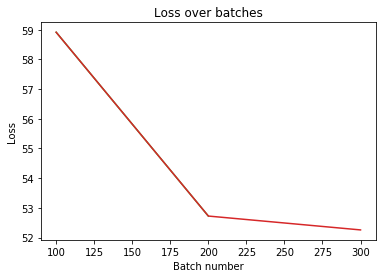

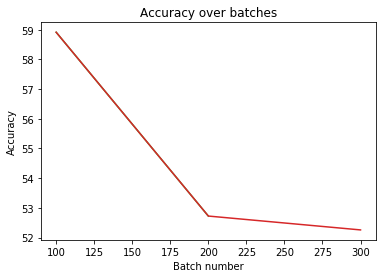

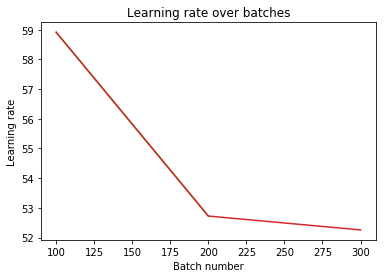

In [4]:
# Run model task 2 with concatenation:
tf.reset_default_graph()

with tf.Session() as sess:

  print("Task 2 with concatenation")
  # some hyper-parameters
  # tweak them as you wish
  batch_size=128  # on CPU, use something much smaller e.g. 1-16
  max_length=30
  lr = 0.001
  lr_decay = 0.0  # set to 0.0 when using Adam optimizer (default)
  emb_dim = 64
  mlp_dim = 128

  stats_tracker = StatsTracker()
  # our model
  model = NeuralIBM1Model_T2(
    x_vocabulary=vocabulary_e, y_vocabulary=vocabulary_f,
    batch_size=batch_size, emb_dim=emb_dim, mlp_dim=mlp_dim, session=sess)

  # our trainer
  trainer = NeuralIBM1Trainer_T2_concat(
    model, train_e_path, train_f_path,
    dev_e_path, dev_f_path, dev_wa,
    num_epochs=1, batch_size=batch_size,
    max_length=max_length, lr=lr, lr_decay=lr_decay, session=sess)

  # now first TF needs to initialize all the variables
  print("Initializing variables..")
  sess.run(tf.global_variables_initializer())

  # now we can start training!
  print("Training started..")
  trainer.train(stats_tracker)
    
  print("Plotting the stats")
  stats_tracker.plot()

In [ ]:
# Run model task 2 with gate:
tf.reset_default_graph()

with tf.Session() as sess:

  print("Task 2 with Gate")
  # some hyper-parameters
  # tweak them as you wish
  batch_size=128  # on CPU, use something much smaller e.g. 1-16
  max_length=30
  lr = 0.001
  lr_decay = 0.0  # set to 0.0 when using Adam optimizer (default)
  emb_dim = 64
  mlp_dim = 128

  stats_tracker = StatsTracker()
  # our model
  model = NeuralIBM1Model_T2_gate(
    x_vocabulary=vocabulary_e, y_vocabulary=vocabulary_f,
    batch_size=batch_size, emb_dim=emb_dim, mlp_dim=mlp_dim, session=sess)

  # our trainer
  trainer = NeuralIBM1Trainer_T2_gate(
    model, train_e_path, train_f_path,
    dev_e_path, dev_f_path, dev_wa,
    num_epochs=10, batch_size=batch_size,
    max_length=max_length, lr=lr, lr_decay=lr_decay, session=sess)

  # now first TF needs to initialize all the variables
  print("Initializing variables..")
  sess.run(tf.global_variables_initializer())

  # now we can start training!
  print("Training started..")
  trainer.train(stats_tracker)
    
  print("Plotting the stats")
  stats_tracker.plot()